In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import pickle

from matplotlib.patches import Rectangle

# Extrapolation, ablation on NK landscapes
## Extrapolation

In [4]:
#load data 
with open('../results/extrapolation_results_NK.pkl', 'rb') as file: 
    extrap_results = pickle.load(file)

In [19]:
pearson_results = np.zeros((8, 6, 4, 6, 6)) # shape = (n_models, k_vals, replicates, train_distances, test_distances)


In [50]:
pearson_results2 = np.zeros((8, 6, 4, 6, 6))

In [51]:
extrap_results.keys()

dict_keys(['blstm', 'cnn', 'gb', 'linear', 'mlp', 'rf', 'transformer', 'ulstm'])

In [8]:
models = ['linear', 'gb', 'rf', 'mlp', 'cnn', 'ulstm', 'blstm', 'transformer']

In [53]:

for model_index, model in enumerate(models): 
    for k_index, k_value in enumerate(extrap_results[model].keys()):         
        for repl_index, replicate in enumerate(extrap_results[model][k_value].keys()): 
            for train_index, train_distance in enumerate(extrap_results[model][k_value][replicate].keys()):
                for test_index, test_distance in enumerate(list(extrap_results[model][k_value][replicate][train_distance][0].keys())[1:]):
                    pearson_results2[model_index][k_index][repl_index][train_index][test_index] = extrap_results[model][k_value][replicate][train_distance][0][test_distance]['pearson_r']
            

In [54]:
pearson_results_mean = np.mean(pearson_results, axis=2)
pearson_results_std  = np.std(pearson_results, axis=2)

pearson_results2_mean = np.mean(pearson_results2, axis=2)
pearson_results2_std  = np.std(pearson_results2, axis=2)

In [46]:
np.nanmax(pearson_results_mean)

np.float64(0.9999999999119262)

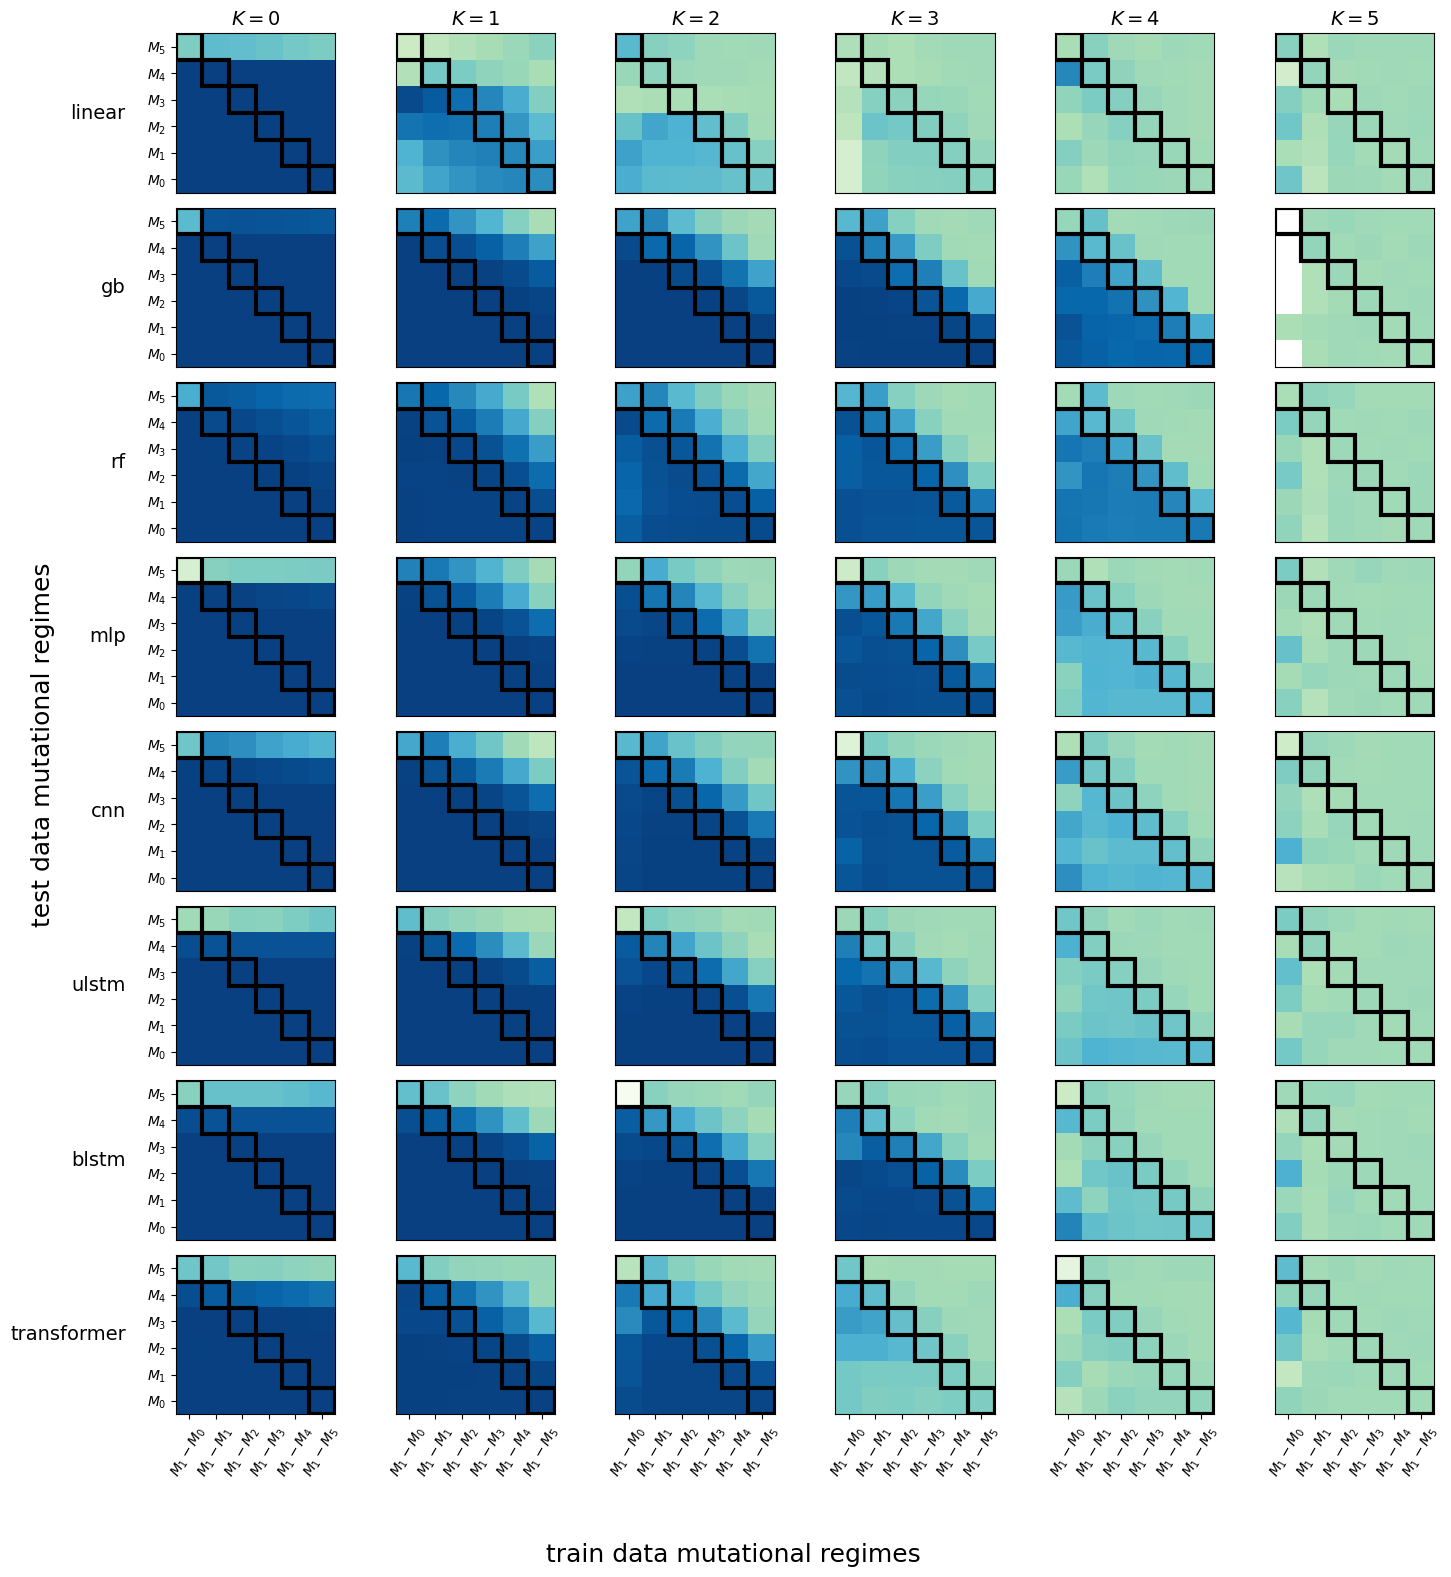

In [93]:
fig, ax = plt.subplots(nrows=8, ncols=6, figsize=(15, 15))

for i in range(pearson_results2_mean.shape[0]):
    for j in range(pearson_results2_mean.shape[1]): 
        data = pearson_results2_mean[i][j]
        ax[i,j].imshow(data, 
                       cmap='GnBu',
                       vmin=np.nanmin(pearson_results2_mean),
                       vmax=np.nanmax(pearson_results2_mean))
        for k in range(6):   
            rect = Rectangle((k - 0.5, k - 0.5), 1, 1, 
                             edgecolor='black', 
                             facecolor='none', 
                             linewidth=3)
            ax[i,j].add_patch(rect)

column_labels = [r'$K=0$', 
                 r'$K=1$', 
                 r'$K=2$', 
                 r'$K=3$', 
                 r'$K=4$',
                 r'$K=5$' ]

for axis, col_label in zip(ax[0], column_labels):
    axis.set_title(col_label, 
                   fontsize=14)


row_labels = models
for axis, row_label in zip(ax[:, 0], row_labels):
    axis.set_ylabel(row_label, 
                    rotation=0, 
                    labelpad=15, 
                    fontsize=14, 
                    ha='right', 
                    va='center')

#do x-axis labels
x_ticks = [f'$M_1-M_{i}$' for i in range(6)]
for col_idx, axis in enumerate(ax[-1]):
    tick_labels = x_ticks
    axis.set_xticks(range(6))  # Set 6 tick positions
    axis.set_xticklabels(tick_labels, 
                         rotation=60, 
                         fontsize=10)

#do y-axis labels
y_ticks = [f'$M_{i}$' for i in range(6)]
for row_idx, axis in enumerate(ax[:,0]): 
    tick_labels = reversed(y_ticks)
    axis.set_yticks(range(6))
    axis.set_yticklabels(tick_labels, 
                         rotation=0, 
                         fontsize=10)

for ax_row in ax[:-1, 1:]:
    for axis in ax_row:
        axis.tick_params(left=False,
                         bottom=False,
                         labelleft=False,
                         labelbottom=False)

for ind, axis in enumerate(ax[-1]): 
    if ind>0: 
        axis.tick_params(left=False, 
                         labelleft=False)

for ind, axis in enumerate(ax[:,0]): 
    if ind<7: 
        axis.tick_params(bottom=False,
                         labelbottom=False)
    


fig.text(0.5, -0.04, 
         'train data mutational regimes', 
         ha='center',
         va='center', 
         fontsize=18)
fig.text(0.04, 0.5, 
         'test data mutational regimes', 
         ha='center', 
         va='center', 
         rotation='vertical', 
         fontsize=18)
fig.tight_layout()
plt.savefig('../figures/extrapolation_NK.svg')
plt.savefig('../figures/extrapolation_NK.png')

## Ablation

In [3]:
#load data 
with open('../results/ablation_results_NK.pkl', 'rb') as file: 
    abl_results = pickle.load(file)

In [6]:
abl_pearson_results = np.zeros((8,6,4,5))

In [9]:
for model_index, model in enumerate(models): 
    for k_index, k_value in enumerate(abl_results[model].keys()):         
        for repl_index, replicate in enumerate(abl_results[model][k_value].keys()): 
            for density_ind, density in enumerate(abl_results[model][k_value][replicate].keys()): 
                abl_pearson_results[model_index][k_index][repl_index][density_ind] = abl_results[model][k_value][replicate][density][0]['test']['pearson_r']
                

In [38]:
abl_prsn_res_means = np.mean(abl_pearson_results, axis=2)
abl_prsn_res_std   = np.std(abl_pearson_results, axis=2)

In [32]:
abl_prsn_res_means.shape

(8, 6, 5)

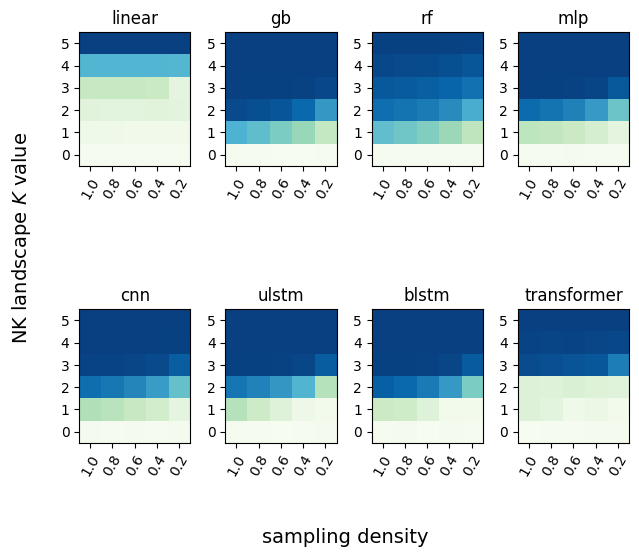

In [81]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (6, 6))



k=0
for i in range(abl_prsn_res_means.shape[0]):
    if i<4:
        j=0
    else: 
        j=1
    if i==4: 
        k=0    
    
    data = abl_prsn_res_means[i]
    #print(data.shape)
    ax[j,k].imshow(abl_prsn_res_means[i], 
                cmap='GnBu', 
                vmin=np.nanmin(abl_prsn_res_means), 
                vmax=np.nanmax(abl_prsn_res_means))
    ax[j,k].set_title(models[i])
    
    k+=1

#do x-axis labels
#do x-axis labels
x_ticks = [1.0, 0.8, 0.6, 0.4, 0.2]
for col_idx, axis in enumerate(ax.flatten()):
    tick_labels = x_ticks
    axis.set_xticks(range(5))  # Set 6 tick positions
    axis.set_xticklabels(tick_labels, 
                         rotation=60, 
                         fontsize=10)

y_ticks = range(6)
for row_idx, axis in enumerate(ax.flatten()): 
    tick_labels = reversed(y_ticks)
    axis.set_yticks(range(6))
    axis.set_yticklabels(tick_labels, 
                         rotation=0, 
                         fontsize=10)

fig.text(-0.04, 0.5, 
         'NK landscape $K$ value', 
         ha='center', 
         va='center', 
         rotation='vertical', 
         fontsize=14)

fig.text(0.5, -0.0, 
         'sampling density', 
         ha='center',
         va='center', 
         fontsize=14)

fig.tight_layout()

plt.savefig('../figures/ablation_NK.svg')
plt.savefig('../figures/ablation_NK.png')

## Interpolation

In [73]:
#load data 
with open('../results/interpolation_results_NK.pkl', 'rb') as file: 
    interp_results = pickle.load(file)

In [75]:
interp_pearson_res = np.zeros((8, 6, 4))

In [ ]:
or model_index, model in enumerate(models): 
    for k_index, k_value in enumerate(extrap_results[model].keys()):         
        for repl_index, replicate in enumerate(extrap_results[model][k_value].keys()):
            
            

In [74]:
interp_results

{'blstm': {'k0': {'r2': {0: {'train': {'pearson_r': 0.9997508906578209,
      'r2': np.float64(0.9994729679588018),
      'mse_loss': 1.1283603319162993e-05,
      'train_epochs': 9},
     'test': {'pearson_r': 0.9997530333401617,
      'r2': np.float64(0.9994766869326815),
      'mse_loss': 1.118547825171845e-05}}},
   'r4': {0: {'train': {'pearson_r': 0.9998285766777252,
      'r2': np.float64(0.999598269940447),
      'mse_loss': 8.340390195371583e-06,
      'train_epochs': 11},
     'test': {'pearson_r': 0.9998255169774283,
      'r2': np.float64(0.9995920117119892),
      'mse_loss': 8.50927463034168e-06}}},
   'r0': {0: {'train': {'pearson_r': 0.9997104364370027,
      'r2': np.float64(0.999241627126389),
      'mse_loss': 1.7001191353253825e-05,
      'train_epochs': 9},
     'test': {'pearson_r': 0.999717981600817,
      'r2': np.float64(0.9992596651331178),
      'mse_loss': 1.714742975309491e-05}}},
   'r7': {0: {'train': {'pearson_r': 0.9999197348209141,
      'r2': np.float